# Lab6

In [22]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                                                                           
# Script Name : Lab7.py
# Author      : Dilan Castañeda                                             
# Created On  : October 13, 2024                                           
# Last Update : October 13, 2024                                         
# Version     : 1.0.0                                          
# Description : residuals and verify their normality
# ─────────────────────────────────────────────────────────────────────────────

In [23]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

## 1. Descarga o copia el dataset

El dataser esta en el siguiente sitio: https://www.reneshbedre.com/assets/posts/anova/onewayanova.txt

In [24]:
# Load the .txt file into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Fat1304/Dataset-del-reto/main/mlb11.csv')
df.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


## 2. Plot the relationship between “runs” and the predictor variable “at_bats”. Find the Pearson correlation and describe the relationship between the variables.

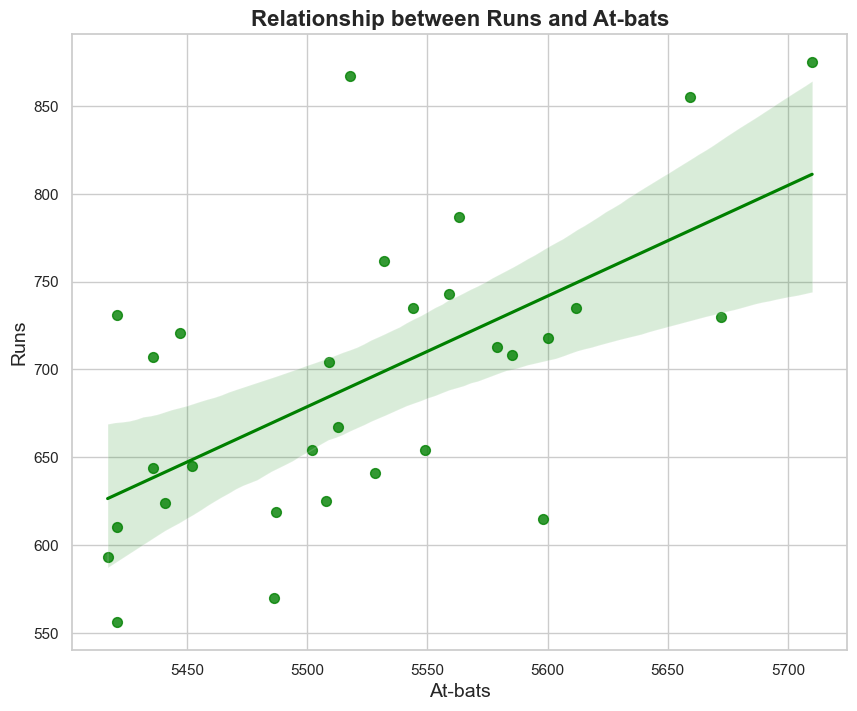

In [37]:
# Scatter plot with regression line
plt.figure(figsize=(10,8))
sns.regplot(x='at_bats', y='runs', data=df, color='green', scatter_kws={'s':50}, line_kws={"color":"green"})
plt.title("Relationship between Runs and At-bats", fontsize=16, fontweight='bold')
plt.xlabel("At-bats", fontsize=14)
plt.ylabel("Runs", fontsize=14)
plt.show()

In [40]:
pearson_corr, p_value = pearsonr(df['at_bats'], df['runs'])
print("RESULTS")
print('Person: ',pearson_corr)
print('P-value: ',p_value)

RESULTS
Person:  0.6106270467206688
P-value:  0.0003388351359791975


**Describe the relationship between the variables:**

La correlación de Pearson es 0.61, lo que sugiere una relación positiva moderada entre los turnos al bate y las carreras anotadas. Esto indica que a medida que aumentan los turnos al bate, también tienden a aumentar las carreras anotadas. El valor p asociado es 0.0003, lo que señala que la correlación es estadísticamente significativa.

## 3.  Plot the residuals of a linear regression, using residplot() function from seaborn.

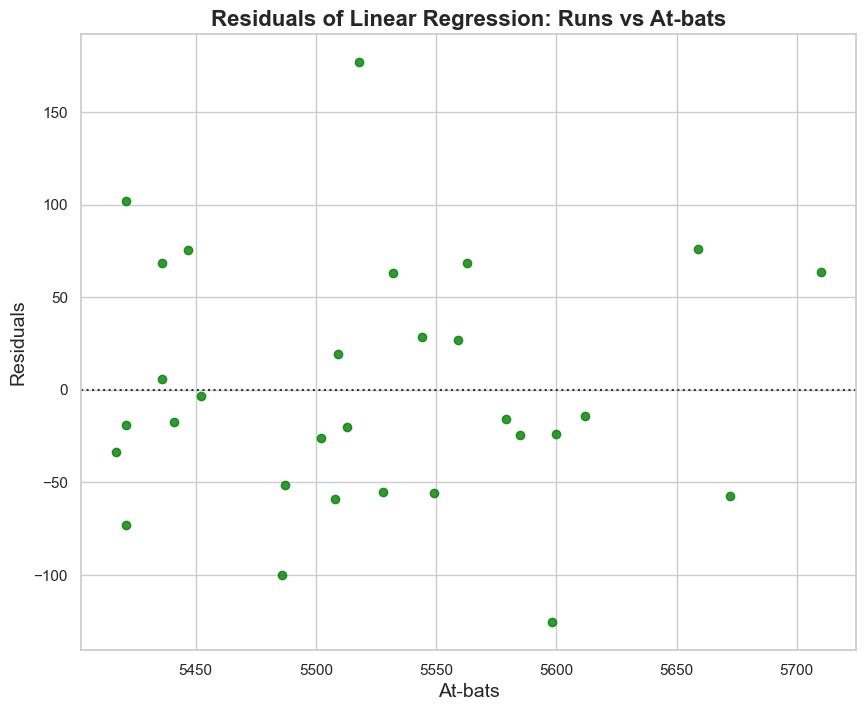

In [41]:
# Residuals
plt.figure(figsize=(10,8))
sns.residplot(x='at_bats', y='runs', data=df, color='green')
plt.title("Residuals of Linear Regression: Runs vs At-bats", fontsize=16, fontweight='bold')
plt.xlabel("At-bats", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.show()

## 4. Fit a linear model and Find the equation of a least squares regression model

In [28]:
X = df['at_bats']
y = df['runs']

# Constant term (intercept) to the predictor
X_with_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_const)
results = model.fit()
intercept, slope = results.params
intercept, slope

(-2789.242885442254, 0.6305499928382827)

## 5. What does the slope tell us in the context of the relationship between success of a team and its home runs?
En el modelo de regresión, la pendiente es 0.6305, lo que implica que por cada incremento en los turnos al bate, se espera un aumento de aproximadamente 0.63 en el número de carreras. En este caso, la pendiente nos muestra cómo los turnos al bate influyen en las carreras anotadas.


## 6. Let's plot at_bats and runs on a scatter plot and show the regression line.

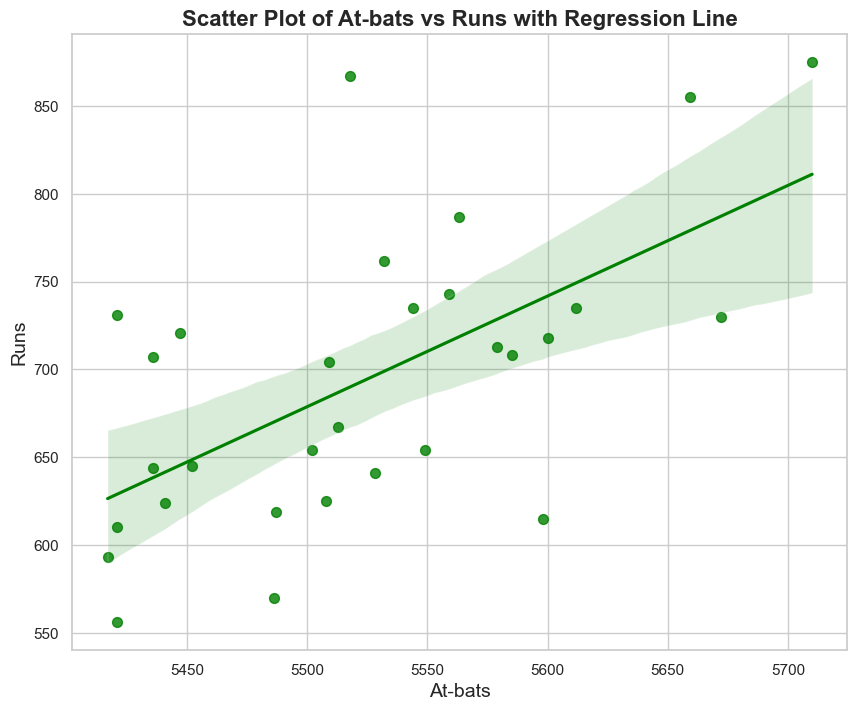

In [42]:
# Predict the values
plt.figure(figsize=(10,8))
sns.regplot(x='at_bats', y='runs', data=df, color='green', scatter_kws={'s':50}, line_kws={"color":"green"})
plt.title("Scatter Plot of At-bats vs Runs with Regression Line", fontsize=16, fontweight='bold')
plt.xlabel("At-bats", fontsize=14)
plt.ylabel("Runs", fontsize=14)
plt.show()

## 7.  If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,578 at-bats? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction?

In [44]:
# Define coefficients for the regression equation
INTERCEPT = -2789.24
SLOPE = 0.6305

# Define the value of at_bats
at_bats_value = 5579

# Function to calculate predicted runs
def calculate_predicted_runs(at_bats):
    return INTERCEPT + (SLOPE * at_bats)

# Function to get actual runs and calculate residuals
def get_actual_runs_and_residual(df, at_bats):
    if at_bats in df['at_bats'].values:
        actual_runs = df.loc[df['at_bats'] == at_bats, 'runs'].values[0]
        predicted_runs = calculate_predicted_runs(at_bats)
        residual = actual_runs - predicted_runs
        return predicted_runs, actual_runs, residual
    else:
        return None, None, None

# Main execution
predicted_runs, actual_runs, residual = get_actual_runs_and_residual(df, at_bats_value)

if actual_runs is not None:
    print(f"Predicted Runs: {predicted_runs}, Actual Runs: {actual_runs}, Residual: {residual}")
else:
    print(f"No data found for at_bats value: {at_bats_value}")


Predicted Runs: 728.3195000000001, Actual Runs: 713, Residual: -15.319500000000062


## 8. To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability. Plot the residuals and verify their normality using any of the methods shown in class


c:\Users\dilan\Documents\Github\DataAnalysis_and_AI\.venv\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


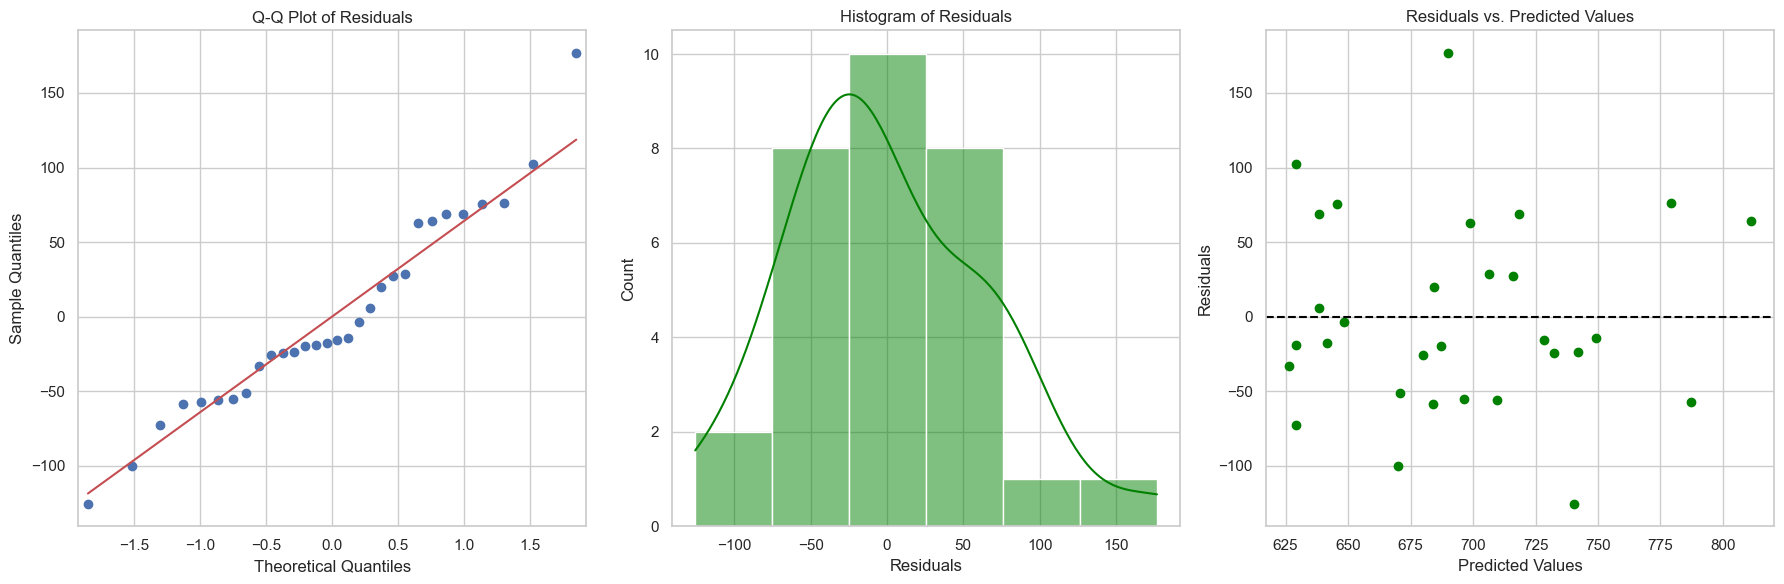

In [45]:
# Fit the regression model
X = sm.add_constant(df['at_bats'])
model = sm.OLS(df['runs'], X).fit()

# Get residuals and predicted runs
residuals = model.resid
predicted_runs = model.predict(X)

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1. Q-Q plot to check normality
sm.qqplot(residuals, line='s', ax=axs[0], color='green')
axs[0].set_title('Q-Q Plot of Residuals')

# 2. Histogram of residuals
sns.histplot(residuals, kde=True, color='green', ax=axs[1])
axs[1].set_title('Histogram of Residuals')
axs[1].set_xlabel('Residuals')

# 3. Residuals vs. Predicted values plot
axs[2].scatter(predicted_runs, residuals, color='green')
axs[2].axhline(0, linestyle='--', color='black')
axs[2].set_title('Residuals vs. Predicted Values')
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
